# Adult Income Classification (Data from year 1996)


#### Assignment checklist
1. Load the data
2. Perform some lightweight exploratory data analysis
3. Create train/test splits from the data
4. Fit at least 5 (but hopefully more) different classification model forms to the train split
5. Score all fitted models on your test split (using at least an F1 score)
6. Record the best performing regression model in your model selection

#### Models to try:

1. 1kNN
2. Naive Bayes
3. SVMs
4. Logistic Regression
5. DecisionTree
6. RandomForrest
7. GradientBoosting
8. AdaBoost
9. Multilayer Perceptron
10. Voting Ensemble
11. Stacking Ensemble
12. Ridge Classifier
13. LASSO Classifier

Make sure you do at least a little bit of hyper parameter tuning! 

## Imports and Dataframe Setup

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import CategoricalNB 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier




In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

In [3]:

# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 



{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [4]:
# Create DataFrames
df_features = pd.DataFrame(X)
df_targets = pd.DataFrame(y)

# Combine them 
df= pd.concat([df_features, df_targets], axis=1)

In [5]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Exploratory Data Analysis 

In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


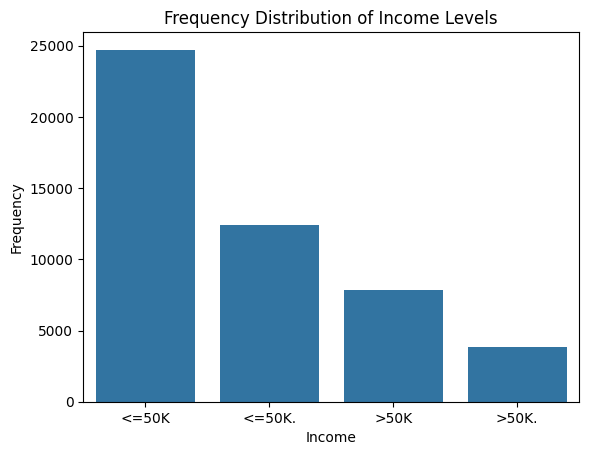

In [7]:
# Create bar chart to see distribution of income levels

# Count the frequency of each category in the 'income' column
income_counts = df['income'].value_counts()

# Creating and plotting bar graph
sns.barplot(x=income_counts.index, y=income_counts.values)
plt.title('Frequency Distribution of Income Levels')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [8]:
print(df['income'].value_counts())

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64


#### Appears to be issues with category naming conventions. Will alter to have fit into binary classifications

In [9]:
import pandas as pd


# Standardizing values in 'income' column
df['income'] = df['income'].replace({'>50K': '>=50K', '>50K.': '>=50K', '<50K': '<=50K', '<=50K.': '<=50K'})

# Verify changes 
print(df['income'].value_counts())



income
<=50K    37155
>=50K    11687
Name: count, dtype: int64


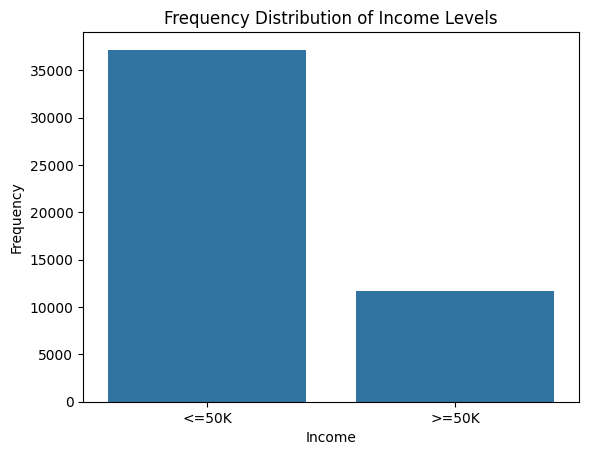

In [10]:
# Count the frequency of each category in the 'income' column
income_counts = df['income'].value_counts()

# Creating and plotting bar graph
sns.barplot(x=income_counts.index, y=income_counts.values)
plt.title('Frequency Distribution of Income Levels')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

## Encoding and Transforming Data

In [11]:
# Scaling numerical data and one-hot-encoding categorical data so it can be used in ML model

# Define categorical and numerical columns
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(sparse=False), categorical_cols)])



In [12]:
#Converting transformations back to df to assess changes

# Fit and transform the data
transformed_data = preprocessor.fit_transform(df)
# Extract new column names for one-hot encoded categories
new_categorical_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
new_columns = numerical_cols + list(new_categorical_features)
# Convert the transformed data back to a DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=new_columns)
# Display the transformed DataFrame
transformed_df.head(5)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_nan
0,0.025996,-1.061979,1.136512,0.146932,-0.217127,-0.034087,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.828308,-1.007104,1.136512,-0.144804,-0.217127,-2.213032,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.046942,0.246034,-0.419335,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.047121,0.426663,-1.197259,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.776316,1.408530,1.136512,-0.144804,-0.217127,-0.034087,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Classificaton Models

### 1kNN Classification Model

In [13]:

# Separate features and target
X = df.drop('income', axis=1)
y = df['income']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply the transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Apply kNN Classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Evaluate the model
score = knn.score(X_test, y_test)
print(f'Model Accuracy: {score}')

y_pred = knn.predict(X_test)

# Make predictions on the test set
# Assuming '>=50K' is the class you consider as positive
f1 = f1_score(y_test, y_pred, pos_label='<=50K') # <=50k yields much higher F1 score
print(f'F1 Score: {f1}')



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model Accuracy: 0.8037670181185382
F1 Score: 0.8719182200841852


### Naive Bayes Model

In [14]:
# Apply Naive Bayes Classifier
nb = GaussianNB()  # or CategoricalNB() depending on your data
nb.fit(X_train, y_train)

# Evaluate the model using accuracy
score = nb.score(X_test, y_test)
print(f'Model Accuracy: {score}')

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Calculate and print the F1 Score
f1 = f1_score(y_test, y_pred, pos_label='<=50K') # <=50k yields much higher F1 score
print(f'F1 Score: {f1}')

Model Accuracy: 0.6229910942778176
F1 Score: 0.6862060151657153


### SVM Classification Model

In [15]:
# Apply SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Evaluate the model using accuracy
score = svm_model.score(X_test, y_test)
print(f'Model Accuracy: {score}')

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate and print the F1 Score
f1 = f1_score(y_test, y_pred, pos_label='<=50K') # <=50k yields much higher F1 score
print(f'F1 Score: {f1}')

Model Accuracy: 0.8593510082915344
F1 Score: 0.9112632394730045


### Logistic Regression Classification Model

In [16]:
# Apply Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Evaluate the model using accuracy
score = logreg_model.score(X_test, y_test)
print(f'Model Accuracy: {score}')

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Calculate and print the F1 Score
f1 = f1_score(y_test, y_pred, pos_label='<=50K') # <=50k yields much higher F1 score
print(f'F1 Score: {f1}')

Model Accuracy: 0.8574060804585935
F1 Score: 0.9094572635684107


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree Classification Model

In [17]:

# Apply Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Evaluate the model using accuracy
score = dt_model.score(X_test, y_test)
print(f'Model Accuracy: {score}')

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Calculate and print the F1 Score
f1 = f1_score(y_test, y_pred, pos_label='<=50K') # <=50k yields much higher F1 score
print(f'F1 Score: {f1}')


Model Accuracy: 0.8205548162555021
F1 Score: 0.8824988269991286


### Random Forest Classification Model

In [18]:

# Apply Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Evaluate the model using accuracy
score = rf_model.score(X_test, y_test)
print(f'Model Accuracy: {score}')

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate and print the F1 Score
f1 = f1_score(y_test, y_pred, pos_label='<=50K') # <=50k yields much higher F1 score
print(f'F1 Score: {f1}')


Model Accuracy: 0.8556658818712253
F1 Score: 0.9078069831306393


### Gradient Boosting Classification Model

In [19]:

# Apply Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Evaluate the model using accuracy
score = gb_model.score(X_test, y_test)
print(f'Model Accuracy: {score}')

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate and print the F1 Score
f1 = f1_score(y_test, y_pred, pos_label='<=50K') # <=50k yields much higher F1 score
print(f'F1 Score: {f1}')


Model Accuracy: 0.86764254273723
F1 Score: 0.9165537270087125


## Best performing Model
#### The best performing model based on F1 score is the Gradient Boosting model. Almost every model scored very well as far as F1 score and accuracy, however. 